# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
dup=df.duplicated()
dup

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [8]:
df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

In [9]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [10]:
fraud = df.loc[df['Class'] == 1]
normal = df.loc[df['Class'] == 0]

In [11]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


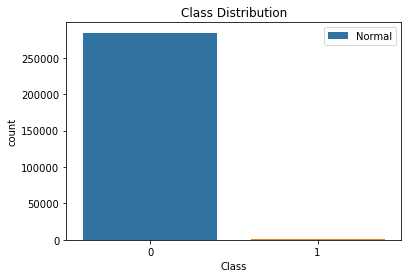

In [12]:
labels={ 'Fraud', 'Normal'}
sns.countplot('Class', data=df)
plt.title('Class Distribution')
plt.legend(labels)

In [13]:
fraud.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [14]:
fraud.sum()

Time      3.972743e+07
V1       -2.347799e+03
V2        1.782899e+03
V3       -3.460374e+03
V4        2.234678e+03
V5       -1.550403e+03
V6       -6.876865e+02
V7       -2.739816e+03
V8        2.807529e+02
V9       -1.269912e+03
V10      -2.793026e+03
V11       1.869685e+03
V12      -3.079621e+03
V13      -5.379224e+01
V14      -3.430088e+03
V15      -4.572094e+01
V16      -2.036853e+03
V17      -3.279592e+03
V18      -1.105184e+03
V19       3.348844e+02
V20       1.831811e+02
V21       3.510855e+02
V22       6.912050e+00
V23      -1.983152e+01
V24      -5.172411e+01
V25       2.039285e+01
V26       2.541088e+01
V27       8.392280e+01
V28       3.722831e+01
Amount    6.012797e+04
Class     4.920000e+02
dtype: float64

In [15]:
normal.count()

Time      284315
V1        284315
V2        284315
V3        284315
V4        284315
V5        284315
V6        284315
V7        284315
V8        284315
V9        284315
V10       284315
V11       284315
V12       284315
V13       284315
V14       284315
V15       284315
V16       284315
V17       284315
V18       284315
V19       284315
V20       284315
V21       284315
V22       284315
V23       284315
V24       284315
V25       284315
V26       284315
V27       284315
V28       284315
Amount    284315
Class     284315
dtype: int64

In [16]:
normal.sum()

Time      2.696392e+10
V1        2.347799e+03
V2       -1.782899e+03
V3        3.460374e+03
V4       -2.234678e+03
V5        1.550403e+03
V6        6.876865e+02
V7        2.739816e+03
V8       -2.807529e+02
V9        1.269912e+03
V10       2.793026e+03
V11      -1.869685e+03
V12       3.079621e+03
V13       5.379224e+01
V14       3.430088e+03
V15       4.572094e+01
V16       2.036853e+03
V17       3.279592e+03
V18       1.105184e+03
V19      -3.348844e+02
V20      -1.831811e+02
V21      -3.510855e+02
V22      -6.912050e+00
V23       1.983152e+01
V24       5.172411e+01
V25      -2.039285e+01
V26      -2.541088e+01
V27      -8.392280e+01
V28      -3.722831e+01
Amount    2.510246e+07
Class     0.000000e+00
dtype: float64

In [17]:
len(fraud)

492

In [18]:
len(normal)

284315

<AxesSubplot:xlabel='Amount', ylabel='Class'>

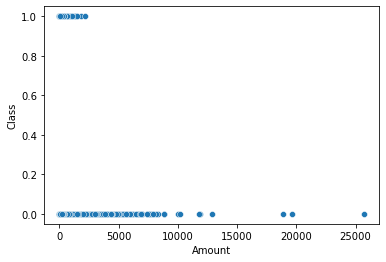

In [19]:
sns.scatterplot(x= 'Amount', y='Class',data=df)

<AxesSubplot:xlabel='Amount', ylabel='Time'>

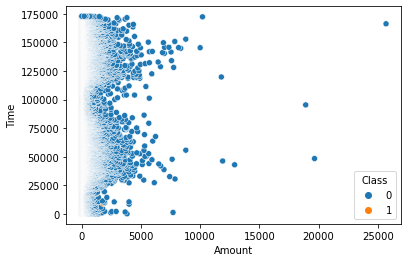

In [20]:
sns.scatterplot(x= 'Amount', y='Time', hue='Class',data=df)

<AxesSubplot:>

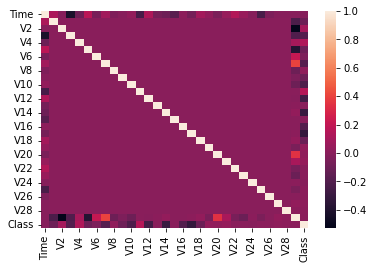

In [21]:
sns.heatmap(df.corr())

In [22]:
df1=df.copy()

In [23]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [24]:
X = df1.drop(["Class"],axis=1)
y = df1["Class"]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1234)

In [27]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

we have 199364 training dat set and 85443 testing data set

In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_predict=log.predict(X_test)
y_predict

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
accuracy_score(y_test,y_predict)*100

99.8899851362897

<AxesSubplot:>

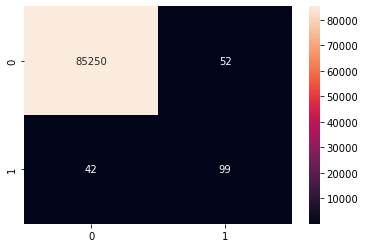

In [30]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.66      0.70      0.68       141

    accuracy                           1.00     85443
   macro avg       0.83      0.85      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
import pickle
pickle.dump(log, open('fraud_detection.pkl', 'wb'))

In [33]:
import pickle

def cc_detection(features):
    
    pickled_model = pickle.load(open('fraud_detection.pkl', 'rb'))
    fraud= str(round(list(pickled_model.predict([features]))[0]))
    
    return str("creditcard fraud detection "  + fraud)

In [34]:
import random
test_features  = list(X_test.iloc[random.randint(0,86000),:])
test_features

[97491.0,
 -2.17667208853059,
 -2.14609139606954,
 0.828686192463099,
 -0.0743401854366139,
 2.90392900173791,
 -1.98172925251654,
 -0.978601343414636,
 0.170146902461373,
 1.66802058662578,
 -0.993694224440975,
 0.831656335158141,
 -2.26762786046041,
 0.206358954081106,
 1.94240448794873,
 -2.06280639139919,
 -0.414951452938375,
 0.34705397905605,
 0.834136085606116,
 0.37518604041898,
 0.491571006792464,
 0.264139635778391,
 0.321745702846997,
 0.190203295663787,
 -0.381013200581739,
 0.169444359256412,
 0.116865653959264,
 -0.0259696168424914,
 0.175170451388988,
 38.4]

In [35]:
cc_detection(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'creditcard fraud detection 0'